In [2]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
from scipy import stats
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

from backtester.dataSource.yahoo_data_source import YahooStockDataSource
from datetime import datetime

### Get Data

In [9]:
startDateStr = '2010/04/20'
endDateStr = '2020/04/20'
cachedFolderName = 'yahooDataTriAgl/'
dataSetId = 'testPairsTrading'
instrumentIds = ['EURUSD=X', 'EURGBP=X','GBPUSD=X' ]
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']

Processing data for stock: EURUSD=X
Processing data for stock: EURGBP=X
Processing data for stock: GBPUSD=X
20% done...
40% done...
60% done...
80% done...


### Get Feature

In [50]:
conv1 = data['EURUSD=X']
conv2 = data['EURGBP=X']
conv3 = data['GBPUSD=X']
comp = conv2*conv3

### Visualize

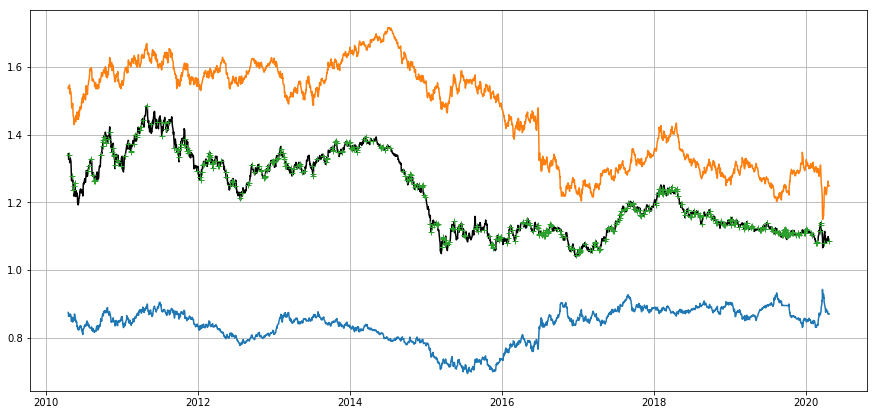

In [73]:
plt.figure(figsize=(15,7))
plt.plot(conv1,label = data.columns[0], color='black')
plt.plot(conv2,label = data.columns[1])
plt.plot(conv3,label = data.columns[2])
plt.plot(comp[comp>conv1],linestyle='None', marker = '+')
plt.grid()

### Trade

In [71]:
def trade(conv1,conv2, conv3, money):


    comp = conv2*conv3

  
    profit = 0
    for i in range(len(comp)):
        
        if comp[i]>conv1[i] :
            curr1_mny = money*conv1[i]
            comp_mny = money*comp[i]
            profit+=comp_mny-curr1_mny
            
    return profit

In [72]:
trade(conv1, conv2, conv3, 10000)

2253.547529799969

### References
https://medium.com/@BlockchainEng/triangular-arbitrage-with-cryptocurrency-on-binance-exchange-with-python-videos-and-code-real-bc63d0905d05